In [ ]:
import os
import random
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/train_data'
test = '/content/drive/MyDrive/test_data'
# Load the dataset
images = []
labels = []

In [ ]:
for species_folder in os.listdir(data_dir):
    species_path = os.path.join(data_dir, species_folder)
    
    # Iterate over each image file in the species folder
    for filename in os.listdir(species_path):
        img = cv2.imread(os.path.join(species_path, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))
            img = img / 255.0
            images.append(img)
            labels.append(species_folder)
            
images = np.array(images)
labels = np.array(labels)

In [ ]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_encoded = to_categorical(labels_encoded)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(images, labels_encoded, epochs=25, batch_size=32)

Epoch 1/25
5/5 [==============================] - 6s 871ms/step - loss: 2.9030 - accuracy: 0.0533
Epoch 2/25
5/5 [==============================] - 6s 1s/step - loss: 2.7372 - accuracy: 0.1000
Epoch 3/25
5/5 [==============================] - 4s 837ms/step - loss: 2.6854 - accuracy: 0.1600
Epoch 4/25
5/5 [==============================] - 4s 881ms/step - loss: 2.5605 - accuracy: 0.1867
Epoch 5/25
5/5 [==============================] - 6s 1s/step - loss: 2.4792 - accuracy: 0.2000
Epoch 6/25
5/5 [==============================] - 4s 849ms/step - loss: 2.3562 - accuracy: 0.2400
Epoch 7/25
5/5 [==============================] - 5s 984ms/step - loss: 2.4075 - accuracy: 0.1733
Epoch 8/25
5/5 [==============================] - 6s 1s/step - loss: 2.3027 - accuracy: 0.2533
Epoch 9/25
5/5 [==============================] - 4s 838ms/step - loss: 2.1957 - accuracy: 0.3467
Epoch 10/25
5/5 [==============================] - 5s 1s/step - loss: 2.0767 - accuracy: 0.3400
Epoch 11/25
5/5 [==============

In [ ]:
random_species_folder = random.choice(os.listdir(test))
random_species_path = os.path.join(test, random_species_folder)
random_image_filename = random.choice(os.listdir(random_species_path))
random_image_path = os.path.join(random_species_path, random_image_filename)

In [ ]:
random_image = cv2.imread(random_image_path)
random_image = cv2.resize(random_image, (128, 128))
random_image = random_image / 255.0

1/1 [==============================] - 0s 91ms/step
Predicted bird species: ['bonegl']


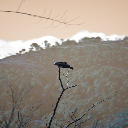

In [ ]:
prediction = model.predict(np.array([random_image]))
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
print("Predicted bird species:", predicted_label)

from PIL import Image

img_pil = Image.fromarray(np.uint8(random_image * 255))
img_pil.show()